In [14]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
WINDOW_SIZE = 120
BATCH_SIZE = 1
N_EPOCHS = 10
PATH = 'data/sunspots.csv'

In [16]:
def load_data(path):
    df = pd.read_csv(path)
    df.columns = ['x', 'date', 'monthly_mean_sunspots']
    df = df.set_index('date')
    df = df['monthly_mean_sunspots']
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
    df = df.asfreq('ME')
    return df

df = load_data(PATH)

time = df.index
series = df.values

In [17]:
test_size = 800
val_size = 200

train_val_series, train_val_time = series[:-test_size], time[:-test_size]
test_series, test_time = series[-test_size:], time[-test_size:]

train_series, train_time = train_val_series[:-val_size], train_val_time[:-val_size]
val_series, val_time = train_val_series[-val_size:], train_val_time[-val_size:]
 
train_series = train_series.reshape((len(train_series), 1))
val_series = val_series.reshape((len(val_series), 1))
test_series  = test_series.reshape((len(test_series), 1))

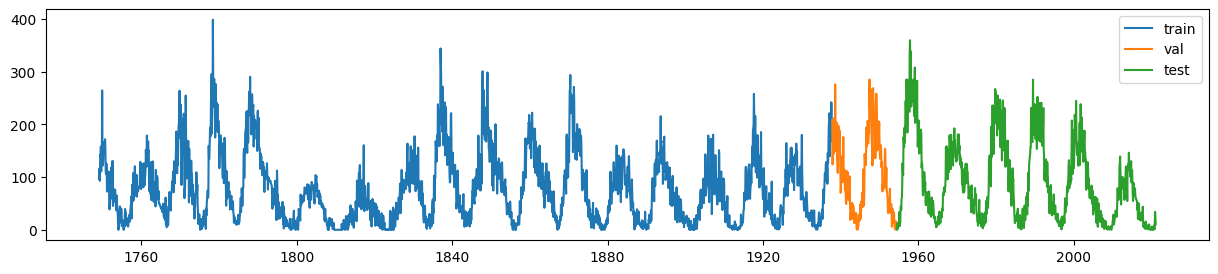

In [18]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(train_time, train_series, label='train')
ax.plot(val_time, val_series, label='val')
ax.plot(test_time, test_series, label='test')
ax.legend()
plt.show()

In [19]:
train_generator = TimeseriesGenerator(
    train_series, 
    train_series,
    length=WINDOW_SIZE, 
    sampling_rate=1,
    stride=1,
    batch_size=BATCH_SIZE
)

val_generator = TimeseriesGenerator(
    val_series, 
    val_series,
    length=WINDOW_SIZE, 
    sampling_rate=1,
    stride=1,
    batch_size=BATCH_SIZE
)

test_generator = TimeseriesGenerator(
    test_series, 
    test_series,
    length=WINDOW_SIZE, 
    sampling_rate=1,
    stride=1,
    batch_size=BATCH_SIZE
)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE, 1)),
    tf.keras.layers.LSTM(2, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

In [21]:
history = model.fit(train_generator, validation_data=val_generator, epochs=N_EPOCHS, verbose=1)

Epoch 1/10
   2/2145 ━━━━━━━━━━━━━━━━━━━━ 3:28 98ms/step - loss: 563.8677 

c:\users\robet\venvs\.deepl\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2145/2145 ━━━━━━━━━━━━━━━━━━━━ 119s 52ms/step - loss: 9793.3613 - val_loss: 16834.2852
Epoch 2/10
2145/2145 ━━━━━━━━━━━━━━━━━━━━ 106s 50ms/step - loss: 10045.6396 - val_loss: 16496.7695
Epoch 3/10
2145/2145 ━━━━━━━━━━━━━━━━━━━━ 131s 61ms/step - loss: 9360.8809 - val_loss: 16164.0986
Epoch 4/10
2145/2145 ━━━━━━━━━━━━━━━━━━━━ 147s 69ms/step - loss: 8829.0410 - val_loss: 15839.0811
Epoch 5/10
2145/2145 ━━━━━━━━━━━━━━━━━━━━ 119s 55ms/step - loss: 9478.4375 - val_loss: 15528.1455
Epoch 6/10
2145/2145 ━━━━━━━━━━━━━━━━━━━━ 134s 63ms/step - loss: 8755.0361 - val_loss: 15222.2324
Epoch 7/10
2145/2145 ━━━━━━━━━━━━━━━━━━━━ 161s 75ms/step - loss: 8934.8613 - val_loss: 14924.5293
Epoch 8/10
2145/2145 ━━━━━━━━━━━━━━━━━━━━ 143s 67ms/step - loss: 8517.4814 - val_loss: 14634.4453
Epoch 9/10
2145/2145 ━━━━━━━━━━━━━━━━━━━━ 113s 53ms/step - loss: 7975.3477 - val_loss: 14350.8887
Epoch 10/10
2145/2145 ━━━━━━━━━━━━━━━━━━━━ 132s 61ms/step - loss: 7736.8257 - val_loss: 14077.5732


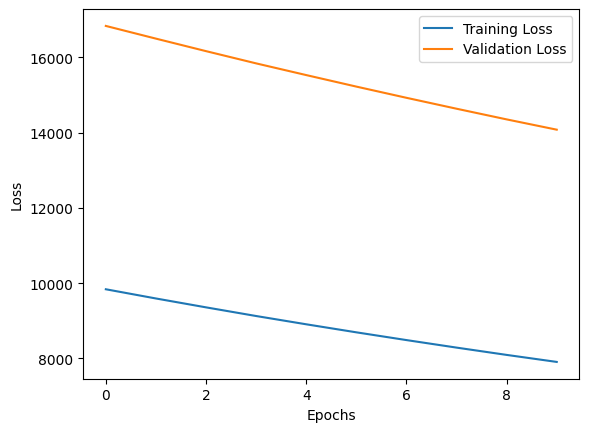

In [22]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.legend()
plt.show()

In [23]:
test_predictions = model.predict(test_generator)
train_predictions = model.predict(train_generator)

680/680 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step
2145/2145 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step


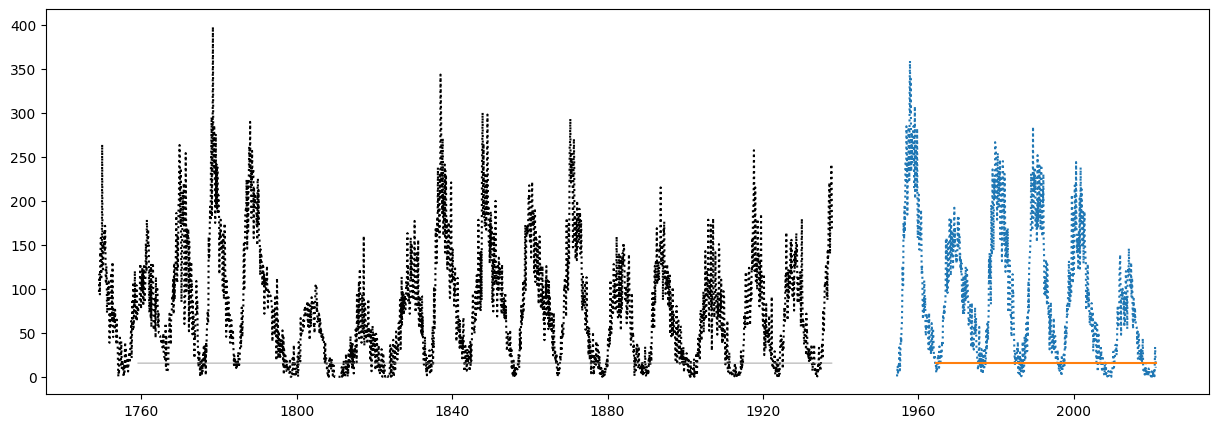

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(train_time, train_series, ':', color='black', label='y_train')
ax.plot(train_time[WINDOW_SIZE:], train_predictions, color='gray', linewidth=0.5, label='y_train_pred')

ax.plot(test_time, test_series, ':')
ax.plot(test_time[WINDOW_SIZE:], test_predictions)
plt.show()

In [25]:
ypred = []
ytest = []
for batch in test_ds:
    inputs, targets = batch
    ypred_batch = model.predict(inputs, verbose=0)
    ypred.extend(ypred_batch.flatten())
    ytest.extend(targets.numpy().flatten())

NameError: name 'test_ds' is not defined

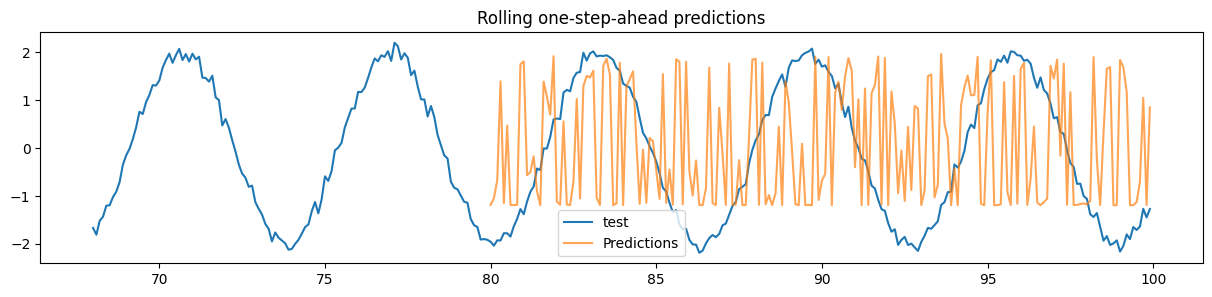

In [72]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(test_time, test_series, label='test')
ax.plot(test_time[WINDOW_SIZE:], ypred, label='Predictions', alpha=0.7)
ax.legend()
ax.set_title('Rolling one-step-ahead predictions')
plt.show()